Karthick Ramasubramanian - KR33733

Prakhar Bansal - pb25834

Shubham Singh - ss96589

Soumi Basu- sb59982

Soumik Choudhuri- sc64856


URL :  https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans

Top 10 Brands, Attributes chosen, Lift Matrix are seperately mentioned at the bottom of the file.

In [1]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 904 kB 5.8 MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [67.4 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security

In [2]:
import time

import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

url='https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans'

# wd.close()

In [3]:
wd= webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get(url)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [4]:
# date_time=wd.find_elements_by_xpath("//a[@class='Permalink']/time")
# date_time=[i.text for i in date_time]

# msg_txt=wd.find_elements_by_xpath("//div[@class='Message userContent']")
# msg_txt=[i.text for i in msg_txt]

# pd.DataFrame({
#     'date_time':date_time,
#     'message':msg_txt
# })

In [5]:
pg_btn=wd.find_elements_by_xpath("//a[@aria-label='Next Page']")
pg_btn

btn_tbu=pg_btn[0]



In [6]:
def assemble_dt_messages(skip_first=False):
  date_time=wd.find_elements_by_xpath("//a[@class='Permalink']/time")
  date_time=[i.text for i in date_time]

  msg_txt=wd.find_elements_by_xpath("//div[@class='Message userContent']")
  msg_txt=[i.text for i in msg_txt]
  
  df=pd.DataFrame({
    'date_time':date_time,
    'message':msg_txt
                  })
  if skip_first:
    df=df.iloc[1:,:]
  return df


In [7]:
df_messages=pd.DataFrame()
ct_cmnts=df_messages.shape[0]

min_num_words=5

pg_ct=0
while ct_cmnts<=5000:
  temp_df=assemble_dt_messages()

  temp_df=temp_df.loc[(temp_df.message.apply(lambda e: len(set(str(e).split(' '))))>min_num_words),]#we assert our comment to have at least these many, here 5, number of words


  df_messages=pd.concat([df_messages,temp_df])
  df_messages=df_messages.drop_duplicates(subset=['message'])#We will drop repetitive messages like 'lol', 'same here' and any other

  pg_btn=wd.find_elements_by_xpath("//a[@aria-label='Next Page']")
  pg_btn
  # time.sleep(1)

  btn_tbu=pg_btn[0]
  btn_tbu.click()
  # time.sleep(0.3)

  pg_ct+=1

  


  ct_cmnts=df_messages.shape[0]

  # print(ct_cmnts)
  # display(pd.concat([temp_df.head(3),df_messages.tail(2)]))

In [8]:
df_messages['message'].value_counts()[:10]#.plot(kind='bar')

df_messages=df_messages.iloc[:5000]
df_messages.head()

,date_time,message
0,March 2002,Entry level performance luxury sedans are a ho...
1,March 2002,I personally think that with a few tweaks the ...
2,March 2002,I am debating a new purchase and these two are...
3,March 2002,"Great handling, RWD, excellent engine and the ..."
4,March 2002,And no manual tranny. That may not matter to y...


In [9]:
from google.colab import files

df_messages.to_csv('msg_txt_endmunds.csv')
files.download('msg_txt_endmunds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# temp=df_messages.message.apply(lambda e: len(str(e).split(' '))).value_counts()

# df_messages[df_messages.message.apply(lambda e: len(str(e).split(' ')))==1]
##Comment Count

# TASK A

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [12]:
df=pd.read_csv('msg_txt_endmunds.csv',usecols=[1,2])
# df=df_messages.copy()

In [13]:
import string
import re
string.punctuation#even removing the fullstops, it may influence the result slightly bcos of presence of abbreviations

df['msg']=df['message'].apply(lambda e : re.sub(r'[^\w\s]','',str(e)).replace('\n\n',' ') )

In [14]:
msg_txt=' '.join(df['msg'])
msg_txt=msg_txt.lower()
# msg_txt


In [15]:
from collections import defaultdict
word_count=defaultdict(int)

ct=0
for w in msg_txt.split(' '):
  ct+=1
  word_count[w]+=1



## Frequency Distribution For first 100 words



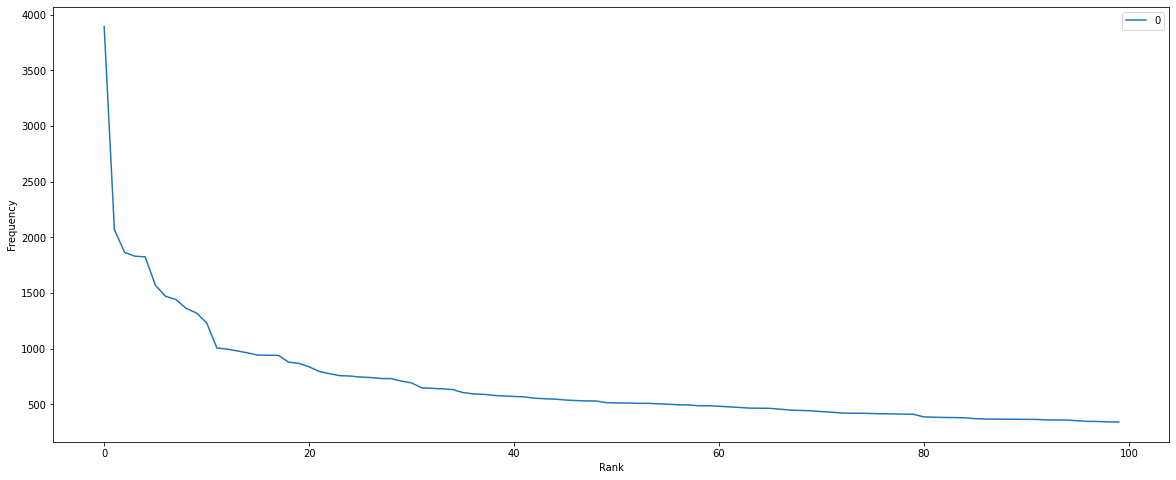

In [60]:
word_ct_sorted={i:j for i,j in sorted(word_count.items(), key=lambda d:d[1],reverse=True)}
pd.Series(word_ct_sorted).reset_index()[:100].plot(kind='line',figsize=(20,8),xlabel='Rank',ylabel='Frequency')

In [17]:
len(word_count)

22727

In [18]:
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')

# dir(wordnet.synsets('apple')[1])

word_ct_synonyms=[(k,v,len(wordnet.synsets(k)))
 for k,v in word_count.items()]


df_wrd=pd.DataFrame(word_ct_synonyms)
df_wrd.columns=['word','ct','ct_synms']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [19]:
from scipy.stats import rankdata
df_wrd[['rk_ct','rk_synms']]=df_wrd[['ct','ct_synms']].rank(ascending=False)

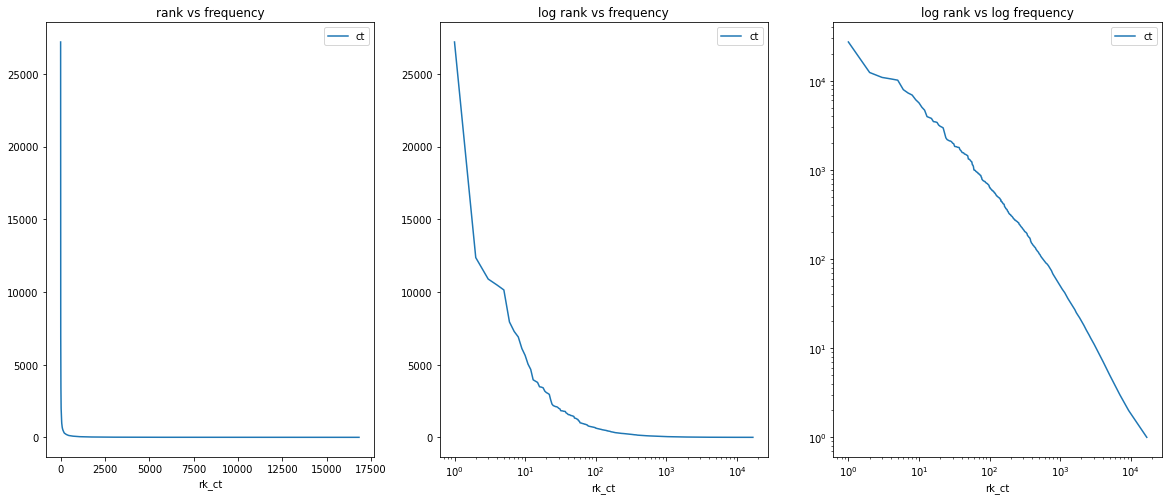

In [20]:
import seaborn as sns

f,ax=plt.subplots(1,3)
df_wrd.sort_values('ct',ascending=False).plot(x='rk_ct',y='ct',figsize=(20,8),ax=ax[0])
df_wrd.sort_values('ct',ascending=False).plot(x='rk_ct',y='ct',figsize=(20,8),ax=ax[1])
df_wrd.sort_values('ct',ascending=False).plot(x='rk_ct',y='ct',figsize=(20,8),ax=ax[2])


ax[0].set_title('rank vs frequency')


ax[1].set_title('log rank vs frequency')
ax[1].set_xscale('log')



ax[2].set_title('log rank vs log frequency')
ax[2].set_xscale('log')
ax[2].set_yscale('log')


# ax[2].plot(1/df_wrd['rk_ct'],df_wrd['rk_ct'],c='r')
# sns.regplot(x=np.log(df_wrd['rk_ct']),y=np.log(df_wrd['ct']),data=df_wrd,ax=ax[0])#.sort_values('ct',ascending=False))



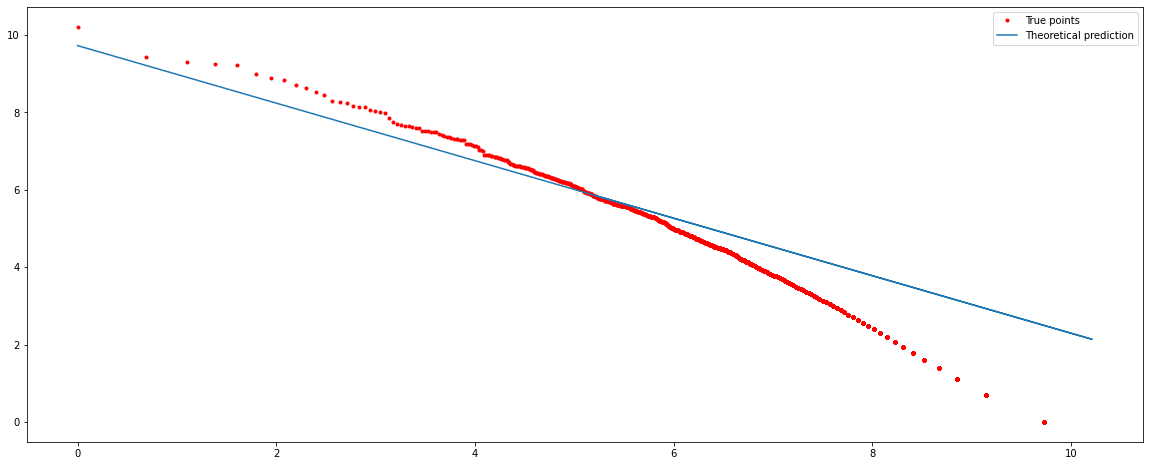

In [21]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(np.log(df_wrd['ct']).to_frame(),np.log(df_wrd['rk_ct']))


plt.figure(figsize=(20,8))

plt.plot(np.log(df_wrd['rk_ct']),np.log(df_wrd['ct']),'r.',label='True points ')
plt.plot(np.log(df_wrd['ct']),model.predict(np.log(df_wrd['ct']).to_frame()),label='Theoretical prediction')

plt.legend()
plt.show()

In [22]:
df_wrd.sort_values(by='ct',ascending=False).iloc[:100].corr()#.sort_values('rk_ct_synms')

,ct,ct_synms,rk_ct,rk_synms
ct,1.000000,-0.173803,-0.626525,0.213958
ct_synms,-0.173803,1.000000,0.186889,-0.705540
rk_ct,-0.626525,0.186889,1.000000,-0.193300
rk_synms,0.213958,-0.705540,-0.193300,1.000000


In [23]:
np.corrcoef(np.log(df_wrd['ct']),np.log(df_wrd['rk_ct']))

array([[ 1.        , -0.99773845],
       [-0.99773845,  1.        ]])

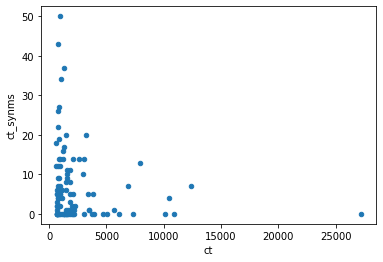

In [24]:
df_wrd.sort_values(by='ct',ascending=False).iloc[:100].plot(x='ct',y='ct_synms',kind='scatter')

# TASK B

In [25]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(msg_txt)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
# len(msg_txt.split(' '))

without_stop_words=[i for i in word_tokens if i not in stop_words]
len(without_stop_words)

252756

In [27]:
from collections import defaultdict
word_count=defaultdict(int)

ct=0
for w in without_stop_words:
  ct+=1
  word_count[w]+=1

In [28]:
# df_brands=pd.read_csv('../car models and brands.csv')
df_brands=pd.read_csv('car models and brands.csv')


In [29]:
def process_str(e):
  e=re.sub(r'[^\w\s]','',str(e)).replace('\n\n',' ')
  return e
lt_brands=list(set(df_brands['Brand'].apply(lambda e: process_str(e).lower()).to_list()))


In [30]:
brand_count={i:j for i,j in word_count.items() if i in lt_brands}
brand_count

{'acura': 515,
 'audi': 371,
 'bmw': 1865,
 'buick': 21,
 'cadillac': 116,
 'car': 3893,
 'chevrolet': 4,
 'chrysler': 46,
 'dodge': 28,
 'ford': 86,
 'honda': 227,
 'hyundai': 104,
 'infiniti': 466,
 'kia': 24,
 'lincoln': 67,
 'mazda': 74,
 'mercedes': 169,
 'mercedesbenz': 36,
 'mercury': 7,
 'mitsubishi': 16,
 'nissan': 214,
 'pontiac': 26,
 'problem': 206,
 'saturn': 11,
 'seat': 211,
 'sedan': 732,
 'subaru': 142,
 'suzuki': 10,
 'toyota': 135,
 'volkswagen': 19,
 'volkwagen': 1,
 'volvo': 159}

In [31]:
def process_str(e):
  e=re.sub(r'[^\w\s]','',str(e)).replace('\n\n',' ')
  return e
lt_models=list(set(df_brands['Model'].apply(lambda e: process_str(e).lower()).to_list()))
model_count={i:j for i,j in word_count.items() if i in lt_models}


In [32]:
df_brands.loc[:,'Model']=df_brands['Model'].apply(lambda e: process_str(e).lower())
df_brands.loc[:,'Brand']=df_brands['Brand'].apply(lambda e: process_str(e).lower())

In [33]:
df_brands.loc[:,'ct_model']=df_brands['Model'].map(model_count)

In [34]:
ct_brand_models=df_brands.groupby('Brand')['ct_model'].sum()
ct_brand=pd.Series(brand_count,name='Brand')

In [35]:
df_brand_ct=pd.merge(ct_brand,ct_brand_models,left_index=True,right_index=True)
df_brand_ct.loc[:,'sum_ct']=df_brand_ct.sum(axis=1)
df_brand_ct.sort_values('sum_ct',ascending=False).iloc[:15]

,Brand,ct_model,sum_ct
car,3893,2069.0,5962.0
bmw,1865,1028.0,2893.0
sedan,732,238.0,970.0
audi,371,545.0,916.0
acura,515,377.0,892.0
honda,227,530.0,757.0
toyota,135,439.0,574.0
infiniti,466,101.0,567.0
nissan,214,290.0,504.0
seat,211,201.0,412.0


In [36]:
top_10_brands=df_brand_ct.sort_values('sum_ct',ascending=False).iloc[1:15].index.to_list()

top_10_brands=[i for i in  top_10_brands if i not in ['sedan','seat','problem']][:10]
from pprint import pprint
pprint(top_10_brands)

['bmw',
 'audi',
 'acura',
 'honda',
 'toyota',
 'infiniti',
 'nissan',
 'mercedes',
 'subaru',
 'volkswagen']


## TASK C

In [37]:
##Just selecting the message based column to work on
df_messages.loc[:,'message']=df_messages.message.astype(str)
df_messages.reset_index(drop=True,inplace=True)
df=df_messages.loc[:,['message']]
df['message']=df['message'].apply(lambda e: process_str(e).lower())

In [38]:
## We will first replace name of models with brand inside every indivdual message 

brand_models=df_brands.drop(['ct_model'],axis=1).set_index('Model')['Brand']

brand_models.index.name= None
brand_models[brand_models=='infiniti']



qx50    infiniti
qx60    infiniti
qx70    infiniti
fx35    infiniti
q50     infiniti
q60     infiniti
q70     infiniti
g37     infiniti
g25     infiniti
6mt     infiniti
Name: Brand, dtype: object

In [39]:
def replace_models_with_brand(e):
  s_e=pd.Series(word_tokenize(e))
  s_e=s_e.replace(brand_models)

  modified_text=' '.join(s_e)

  return modified_text

df['message_only_brands']=df.message.apply(lambda e : replace_models_with_brand(e))
# df=pd.read_csv('txt_with_only_brand_names.csv')
df

,message,message_only_brands
0,entry level performance luxury sedans are a ho...,entry level performance luxury sedan are a hot...
1,i personally think that with a few tweaks the ...,i personally think that with a few tweaks the ...
2,i am debating a new purchase and these two are...,i am debating a new purchase and these two are...
3,great handling rwd excellent engine and the be...,great handling rwd excellent engine and the be...
4,and no manual tranny that may not matter to yo...,and no manual tranny that may not matter to yo...
...,...,...
4995,parking makes me nuts i left my car in my comp...,parking makes me nuts i left my car in my comp...
4996,i feel your paini just noticed a new kink in t...,i feel your paini just noticed a new kink in t...
4997,count me as a turning radius enthusiast in 25 ...,count me as a turning radius enthusiast in 25 ...
4998,i am the person that would park in the next po...,i am the person that would park in the next po...


In [40]:
df.to_csv('txt_with_only_brand_names.csv')
df['message_only_brands']

0       entry level performance luxury sedan are a hot...
1       i personally think that with a few tweaks the ...
2       i am debating a new purchase and these two are...
3       great handling rwd excellent engine and the be...
4       and no manual tranny that may not matter to yo...
                              ...                        
4995    parking makes me nuts i left my car in my comp...
4996    i feel your paini just noticed a new kink in t...
4997    count me as a turning radius enthusiast in 25 ...
4998    i am the person that would park in the next po...
4999    you guys sound like you are the only ones that...
Name: message_only_brands, Length: 5000, dtype: object

In [41]:
def ct_brand_presence(e,list_of_brands=lt_brands,only_indicator=True):

  temp=pd.Series(map(e.count,list_of_brands),
          index=list_of_brands)
  
  if only_indicator:
    temp=(temp>0).astype(int)
  return temp

df_brand_cmt=df.message_only_brands.apply(lambda e:ct_brand_presence(e,list_of_brands=top_10_brands))


In [42]:
# df_brand_cmt.sum().sum()
i='infiniti'
j='infiniti'
bool_cond=(df_brand_cmt[i]==1) & (df_brand_cmt[j]==1)
df_brand_cmt[bool_cond].shape#79,319,433

(433, 10)

In [43]:
cols=sorted(df_brand_cmt.columns)
df_lift=pd.DataFrame(index=cols,columns=cols)

total=df_brand_cmt.sum().sum()
total=5000

for c in cols:
  pair_cols=[i for i in cols if i>c]
  if pair_cols:

    for p_c in pair_cols:
      num=((df_brand_cmt[p_c]*df_brand_cmt[c]).sum())*total
      den=(df_brand_cmt[p_c].sum())*(df_brand_cmt[c].sum())


      df_lift.loc[p_c,c]=num/den
      df_lift.loc[c,p_c]=num/den

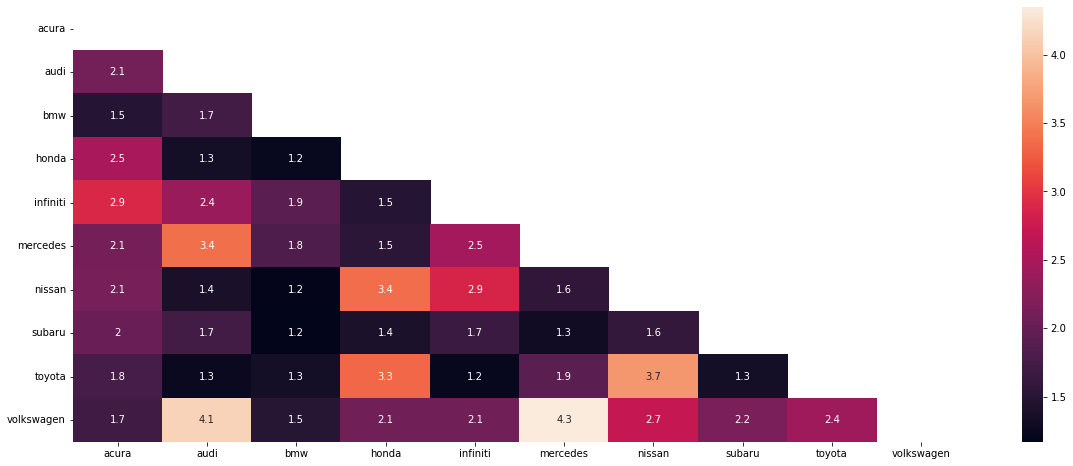

In [44]:
import seaborn as sns
plt.figure(figsize=(20,8))


sns.heatmap(df_lift.fillna(0),
            annot=True,mask=np.triu(df_lift))

## TASK D

In [45]:
# df_disimilarity

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


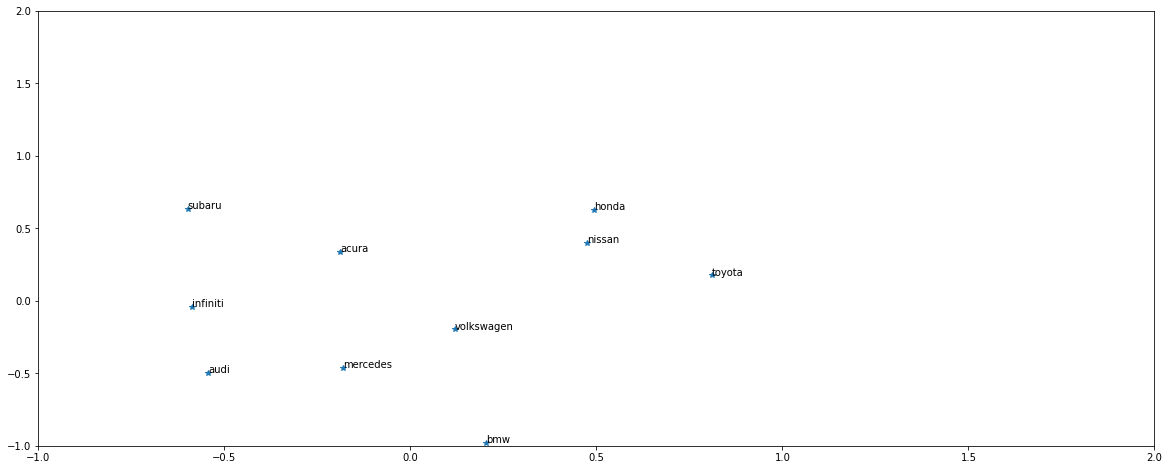

In [46]:
from sklearn.manifold import MDS

df_disimilarity=1/df_lift
df_disimilarity.fillna(0,inplace=True)
df_disimilarity


mds=MDS(n_components=2)

npos=mds.fit_transform(df_disimilarity)

# df_disimilarity.index
plt.figure(figsize=(20,8))

plt.plot(npos[:,0],npos[:,1],'*')
plt.ylim(-1,2)
plt.xlim(-1,2)


for i in range(len(npos)):
  plt.text(npos[i,0],npos[i,1],df_disimilarity.index[i])

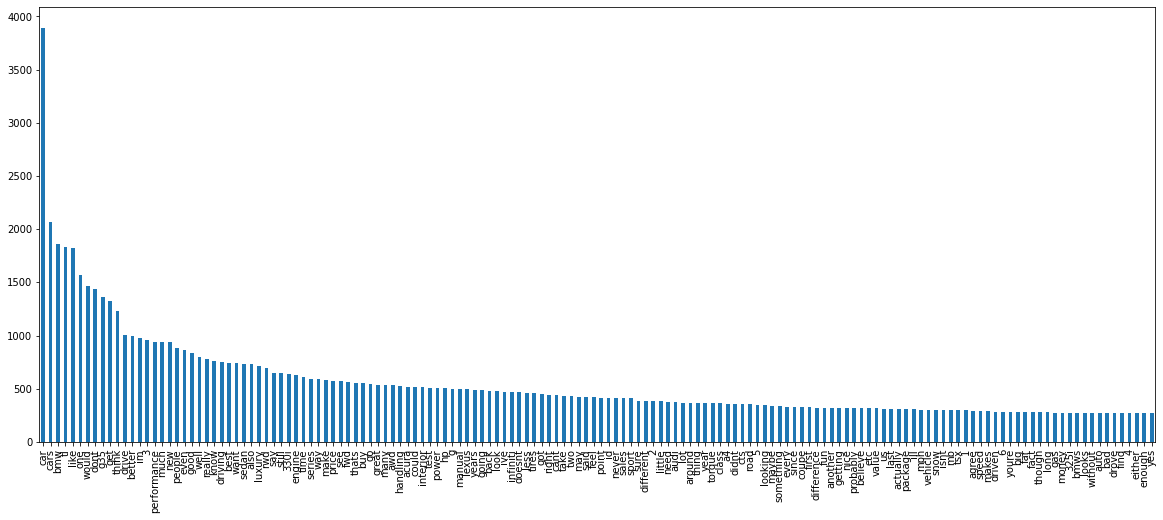

In [47]:
pd.Series(word_count).sort_values(ascending=False).iloc[:150].plot(kind='bar',figsize=(20,8))

## TASK E

Honda, Toyota and Nissan all being Japanese brands have high lift as expected.  

Volkswagen suprisingly has high lift with premium brands like Audi and Merdedes. BMW also has low lift with Audi and Mercedes.  This can be due to people comparing Volkswagen with other brands and consider it as a Value for money option.

We basically see 2 clusters being formed.  1 of Japanese brands (Honda, Toyota & Nissan) and all other brands.

## TASK F

In [48]:
nltk.download('averaged_perceptron_tagger')

temp=set(list(i for i,j in nltk.pos_tag(word_count.keys()) if 'nn' in j.lower()))
df_noun=pd.Series({i:j for i,j in word_count.items() if i in temp})

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [49]:
print(*df_noun.sort_values(ascending=False).iloc[:150].index,sep='\t')

car	cars	dont	get	drive	im	performance	people	sedan	luxury	rwd	engine	time	series	way	price	thats	buy	awd	test	power	hp	g	years	ive	infiniti	doesnt	tires	right	point	id	sales	sport	year	thing	torque	class	cts	didnt	road	something	coupe	difference	value	snow	vehicle	mb	tsx	youre	fact	gas	money	auto	guess	is300	top	things	vs	numbers	reliability	others	front	miles	come	anything	brand	ride	nothing	sedans	regards	sports	system	course	anyone	honda	vehicles	bit	accord	opinion	xtype	quality	driver	experience	transmission	mileage	m3	mpg	seat	thought	line	level	saab	problem	day	cost	world	post	seats	dealer	v6	drivers	market	model	comparison	thanks	reason	times	entry	track	winter	theres	worth	discussion	wheel	choice	size	work	someone	cd	features	problems	pay	tell	everything	mercedes	acceleration	suspension	list	volvo	matter	g35x	standard	steer	issue	lets	try	mind	everyone	msrp	design	fuel	compare	category	premium	subaru	engines	number	is350	deal	owners


In [50]:
'engine','price','performance','luxury','power','tires',

('engine', 'price', 'performance', 'luxury', 'power', 'tires')

In [51]:
lt_attrs=['engine','performance','luxury','power','tires']
top_10_brands_attrs=top_10_brands+lt_attrs
df_brand_attr=df.message_only_brands.apply(lambda e:ct_brand_presence(e,list_of_brands=top_10_brands_attrs))



In [52]:
cols=sorted(df_brand_attr.columns)
df_lift_BrAttr=pd.DataFrame(index=cols,columns=cols)

total=df_brand_attr.sum().sum()
total=5000

for c in cols:
  pair_cols=[i for i in cols if i>c]
  if pair_cols:

    for p_c in pair_cols:
      num=((df_brand_attr[p_c]*df_brand_attr[c]).sum())*total
      den=(df_brand_attr[p_c].sum())*(df_brand_attr[c].sum())


      df_lift_BrAttr.loc[p_c,c]=num/den
      df_lift_BrAttr.loc[c,p_c]=num/den

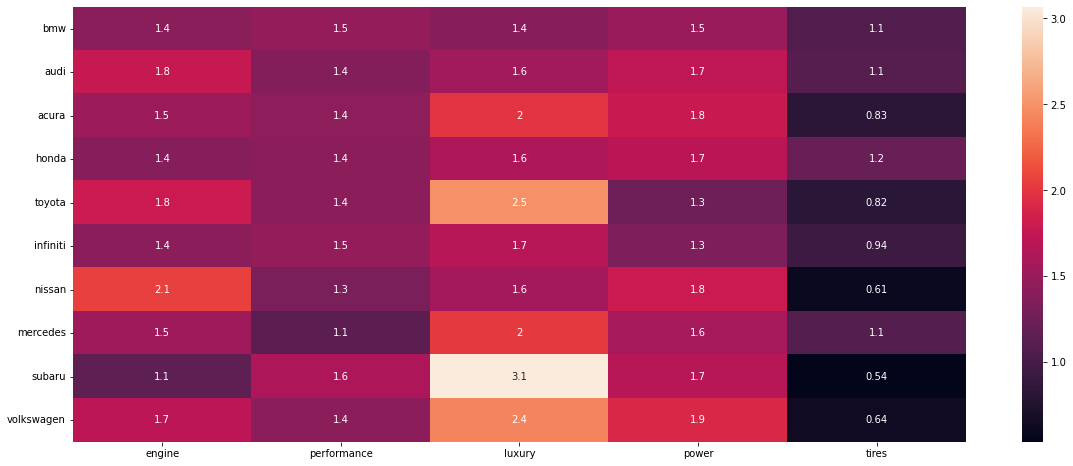

In [53]:
plt.figure(figsize=(20,8))

sns.heatmap(df_lift_BrAttr.loc[top_10_brands,lt_attrs].astype(float),annot=True)

## Task G

Lot of brands have low lift with Tires. 

Toyota has high mentions with Luxury, more than premium brands like Audi, BMW and Mercedes.  

Luxury seams to be the differentiating factor, Subaru has the highest lift while BMW has the lowest.  Luxury is mentioned highly with Subaru, Toyota, Volkswagen and Acura.

Performance lift does not vary much with brands.  

Nissan has the highest lift with Engine.

Variation of lift with the most mentioned attribute Engine, Power and Performance is minimum, whereas Luxury seems to be the determining factor.  There is an indication of Zoning.

## TASK H 

In [54]:
lt_asp_wrds=['would like to buy','would love to buy',
             'eager to buy','love to have',
             'desire to','dream of', 'dream to', 'love to','to own'
             'desire','dream','love','want','own']

lt_asp_wrds=['desire to','desirable','fancy car','eager to buy','would like to buy','love to have','dream car','really want','future car','dream of',"cant wait to buy",'would love to buy','wish to buy','want to buy','aspire to','future car','thinking to buy','love to buy','want to own','love to own','like to own','have to own','nice to own','nice to buy','have to buy','would love to buy','would like to buy','wish to own','looking to buy','looking forward to buy']
#temp=df.message_only_brands[0]
# temp.count('are a')
# temp.replace('are a|alike these', '#####')

In [55]:
df.message_only_brands.iloc[:10].str.replace('are a|entry level','#####')


0    ##### performance luxury sedan ##### hot area ...
1    i personally think that with a few tweaks the ...
2    i am debating a new purchase and these two ###...
3    great handling rwd excellent engine and the be...
4    and no manual tranny that may not matter to yo...
5    one beauty of bmw 3 series is that there are s...
6    good grief so you wait 9 months for the manual...
7    ill give it a fair shot when the manual comes ...
8    i understand its not about the speed i really ...
9    it sounds like you know why i wont even put it...
Name: message_only_brands, dtype: object

In [56]:
df.message_only_brands.iloc[:10].str.replace('are a|entry level','#####')

pattern='|'.join(lt_asp_wrds)

df['msg_aspire']=df.message_only_brands.str.replace(pattern,'aspire')


In [57]:
# df[df.message_only_brands.apply(lambda e : e.count('want to')>1)]
# df_brand_cmt=
df_aspr=df.msg_aspire.apply(lambda e:ct_brand_presence(e,list_of_brands=top_10_brands+['aspire']))




In [58]:
total=df_aspr.sum().sum()
total=5000

df_aspire_lift=pd.Series(index=df_aspr.columns)

for c in df_aspr.columns:
  if c=='aspire':
    print('hi')
    continue

  num=(sum((df_aspr[c])*(df_aspr['aspire'])))*total
  den=(df_aspr[c].sum()*df_aspr['aspire'].sum())

  df_aspire_lift.loc[c]=(num/den)

hi


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [59]:
df_aspire_lift

bmw           1.740174
audi          1.408848
acura         2.001310
honda         1.827918
toyota        1.336050
infiniti      2.030302
nissan        1.205691
mercedes      1.194458
subaru        1.271876
volkswagen    0.732601
aspire             NaN
dtype: float64

For measuring Aspiration, we took all the phrases (we could think of) which signifies a person wanting to buy a car.  Then we replaced all the phrases in the comments to Aspire and used lift between the word "Aspire" and Brands to identify which brands are people wanting to buy the most. 




1. Acura, Infiniti are the brands people want to buy the most. 

2. Volkswagen should be concerned as not many people want to buy this brand.  

3. Asian brands like Nissan and Toyota contrary to popularity in the US have low aspiration.

4. Premium brand have little lift but that is most likely due to people not being able to afford as they are premium expensive brands.

5. Although Toyota has high lift with Luxury their aspiration is low indicating that there may be a negetive relation to luxury.